# 🧹**<font color='00FFBC'>CLEAN TRAIN</font>**🧹

## **<font color='red'>Ubicarnos en el directorio de Drive</font>**

In [1]:
import os
#Acceder a documentos desde google drive
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Master DS/Machine Learning/TAREA/dataset')
os.getcwd()  
!ls

Mounted at /content/drive
datosPumpsLimpios.csv  test.csv  testLimpios.csv  train.csv  train_labels.csv


## **<font color='red'>Carga de Librerías</font>**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

## **<font color='red'>Carga de Datos</font>**

In [3]:
df_pumps = pd.read_csv('train.csv')
df_pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
df_pumps.shape

(59400, 40)

In [ ]:
df_pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## **<font color='red'>Descripción Breve de los datos</font>**

In [ ]:
df_pumps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Se puede observar que se tiene mas variables categoricas, las cuales son como 31 y solo 10 variables cuantitativas. ambién existe una variable fecha a cual sera mejor separar en varias columnas para el año, mes y dia

In [ ]:
df_pumps.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

Casi la mitad de las variables tienen una alta cardinalidad de valores unicos

In [ ]:
df_pumps.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Las variables amount_tsh, num_private, district_code y population tienen valores maximos muy  alejados de la mediana.

In [ ]:
df_pumps.describe(exclude=np.number)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


## **<font color='red'>Variables importantes desde la perspectiva de Inteligencia del negocio</font>**

Las variables mencionadas pueden ser importantes desde una perspectiva de inteligencia de negocio por las siguientes razones:

- amount_tsh: El monto de dinero invertido en el pozo podría proporcionar información sobre la calidad y la capacidad del pozo, y también puede estar relacionado con el estado funcional del pozo. Este dato podría ser relevante para la toma de decisiones sobre la inversión futura en proyectos de agua.

- date_recorded: La fecha en que se registró la información puede proporcionar información sobre la edad y la calidad de la información. También puede estar relacionada con el estado funcional del pozo, ya que los pozos que se registraron hace mucho tiempo pueden ser menos propensos a estar en buen estado de funcionamiento. Este dato podría ser importante para la toma de decisiones sobre la planificación y el mantenimiento de los pozos.

- funder e installer: Estas variables pueden proporcionar información sobre la calidad de los proyectos de agua y las organizaciones involucradas en su construcción y mantenimiento. Por ejemplo, si una organización o un individuo ha construido muchos pozos que se han mantenido en buen estado de funcionamiento, esto puede ser un indicador de la calidad de su trabajo.

- gps_height, longitude y latitude: La ubicación geográfica del punto de agua puede estar relacionada con la calidad del agua y la capacidad del pozo. Por ejemplo, los pozos que se encuentran en áreas con suelos fértiles pueden tener una mayor capacidad de suministrar agua de buena calidad. La información de ubicación también podría ser relevante para la toma de decisiones sobre la inversión en proyectos de agua en áreas geográficas específicas.

- population: La cantidad de personas que viven en la ubicación del punto de agua puede proporcionar información sobre la demanda de agua en la región. Esta información podría ser relevante para la planificación y el mantenimiento de proyectos de agua en el futuro.

- construction_year: El año de construcción del punto de agua puede proporcionar información sobre la edad y la calidad del pozo. Los pozos más antiguos pueden requerir más mantenimiento y reparación que los pozos más nuevos. Esta información podría ser relevante para la toma de decisiones sobre la planificación y el mantenimiento de los pozos.

- extraction_type, management, payment, water_quality, quantity y source: Estas variables pueden proporcionar información sobre los métodos de extracción, gestión y mantenimiento del agua, así como sobre la calidad y la cantidad de agua que se extrae. Esta información podría ser relevante para la toma de decisiones sobre la selección de métodos de extracción, el mantenimiento de los pozos y la calidad del agua suministrada.

En resumen, estas variables pueden proporcionar información importante para la toma de decisiones sobre la inversión, la planificación y el mantenimiento de proyectos de agua, así como para garantizar la calidad y cantidad del agua suministrada a las comunidades.

## **<font color='red'>Transformacion del Tipo de Dato</font>**

In [ ]:
#date_recorded
df_pumps['date_recorded'] = pd.to_datetime(df_pumps['date_recorded'],format='%Y-%m-%d')

In [ ]:
df_pumps['year'] = df_pumps['date_recorded'].dt.year

In [ ]:
df_pumps['month'] = df_pumps['date_recorded'].dt.month    

In [ ]:
df_pumps['day'] = df_pumps['date_recorded'].dt.day

In [ ]:
df_pumps.drop(columns=['date_recorded'], inplace=True)

In [ ]:
df_pumps.dtypes

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

## **<font color='red'>Análisis descriptivo</font>**

### **<font color='orange'>Descripción completa de variables</font>**

In [ ]:
#!pip install pandas_profiling

In [ ]:
import pandas_profiling

<ipython-input-17-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
#pandas_profiling.ProfileReport(df_pumps)

##### **<font color='green'>Resultados profile</font>**



Dada la información proporcionada, a continuación se realiza el análisis descriptivo de cada variable:


- ❌amount_tsh: El 70.1% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua no tienen una cantidad de agua suficiente. Esta variable está altamente sesgada, con un coeficiente de asimetría (γ1) de 43.858.
<font color='green'>Cambios: se eliminará la columna y crearé otra variable dummy que sea 1 cuando sea mayor a cero y 0 en caso contrario.</font> 

- ❌ construction_year: El 35.4% de los datos son iguales a cero, lo que indica que no se sabe el año de construcción de muchas bombas. No se observan valores atípicos. <font color='green'>Cambios: Rellenar datos faltantes con la mediana</font> 

- ❌ funder: El 5.9% de los datos son faltantes, lo que indica que no se conoce el financiamiento de algunas bombas de agua. Esta variable tiene una alta cardinalidad con 981 valores distintos. <font color='green'>Cambios: Rellenar datos faltantes con la categoría de desconocido.</font> 

- ❌ gps_height: El 35.1% de los datos son iguales a cero, lo que indica que la mayoría de las bombas están ubicadas en áreas con una altitud baja. No se observan valores atípicos. <font color='green'>Cambios: crearé otra variable que sea dummy, siendo 0 cuando tenga altitud baja y 1 en caso contrario.</font> 

- ❌ installer: El 5.9% de los datos son faltantes, lo que indica que no se sabe quién instaló algunas bombas de agua. Esta variable tiene una alta cardinalidad con 1092 valores distintos. <font color='green'>Cambios: Rellenar datos faltantes con la categoría de desconocido.</font>  

- lga: Esta variable tiene una alta cardinalidad con 125 valores distintos. <font color='green'>Cambios: transformaré la variable a numerica, donde cada categoría representará un número.</font> 

- ❌longitude: El 3.1% de los datos son iguales a cero, lo que indica que no se conoce la longitud de algunas bombas de agua. No se observan valores atípicos.<font color='green'>Cambios: se rellena los 0 por la media.</font>  

- num_private: El 98.7% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua no tienen instalaciones privadas. Esta variable está altamente sesgada, con un coeficiente de asimetría (γ1) de 50.745. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- ❌ permit: El 5.0% de los datos son faltantes, lo que indica que no se sabe si se obtuvo un permiso para instalar algunas bombas de agua. No se observan valores atípicos. <font color='green'>Cambios: se rellena los NaN con la moda.</font> 

- ❌ population: El 36.7% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua están ubicadas en áreas poco pobladas. No se observan valores atípicos. <font color='green'>Cambios: se rellena los 0 por la media.</font> 

- ❌ public_meeting: El 5.5% de los datos son faltantes, lo que indica que no se sabe si se realizó una reunión pública para informar sobre algunas bombas de agua. No se observan valores atípicos.<font color='green'>Cambios: se rellena los NaN con la moda.</font> 

- recorded_by: Esta variable tiene un valor constante "GeoData Consultants Ltd", lo que indica que todas las observaciones fueron recolectadas por la misma entidad. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- scheme_management: El 6.5% de los datos son faltantes, lo que indica que no se conoce quién administra algunas bombas de agua. No se observan valores atípicos.<font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- scheme_name: El 47.8% de los datos son faltantes, lo que indica que no se conoce el nombre del esquema que se utilizó para algunas bombas de agua. Esta variable tiene una alta cardinalidad con 1790 valores distintos.  <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- subvillage: Esta variable tiene una alta cardinalidad con 8444 valores distintos. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- ward: Esta variable tiene una alta cardinalidad.  <font color='green'>Cambios: transformaré la variable a numerica, donde cada categoría representará un número.</font> 

### **<font color='orange'>Variables repetidas</font>**

##### **<font color='green'>Grupo waterpoint</font>**

In [ ]:
df_pumps['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
df_pumps['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

Parecen tener la misma información, por tanto es mejor eliminar la segunda.

#####**<font color='green'>Grupo source</font>**

In [ ]:
df_pumps['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df_pumps['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
df_pumps['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

Es mejor eliminar source_type porque contiene la misma información que source, mientras que source_class es una subcategoría

#####**<font color='green'>Grupo quantity</font>**

In [ ]:
df_pumps['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [ ]:
df_pumps['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

quantity_group es una copia de quantity, por tanto es mejor eliminar quantity_group.

#####**<font color='green'>Grupo quality</font>**

In [ ]:
df_pumps['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [ ]:
df_pumps['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

La misma información repetida, es mejor eliminar water_group

#####**<font color='green'>Grupo payment</font>**

In [ ]:
df_pumps['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
df_pumps['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

La misma información repetida, es mejor eliminar payment_type

#####**<font color='green'>Grupo management</font>**

In [ ]:
df_pumps['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
df_pumps['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
df_pumps['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

Las categorías 'scheme_management' y 'management' hacen referencia según la descripción de las variables quién opera el punto de agua y quién los gestiona, respectivamente. Mientras que, management_group es una subcategoría de management_group. Por tanto, dado que es la misma información en 'scheme_management' y 'management' se eliminara 'scheme_management'.

#####**<font color='green'>Grupo extraction_type</font>**

In [ ]:
df_pumps['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
df_pumps['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [ ]:
df_pumps['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

La categoría a eliminar es extraction_type por lo mismo que tiene información repetida.

#####**<font color='green'>Eliminar columnas parecidas</font>**

In [ ]:
# Columnas que estan repetidas
columnas = ['extraction_type', 'scheme_management', 'payment_type', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']
df_pumps.drop(columns=columnas,inplace=True )

In [ ]:
#Más variables repetidas que también las hay en tipo de dato númerico y otras que se analizo que tenian que ser eliminadas
df_pumps.drop(columns=['wpt_name','scheme_name','subvillage','region_code', 'recorded_by', 'num_private', 'lga', 'ward', 'installer', 'funder'],inplace=True )

## **<font color='red'>Tratamiento de valores extremos</font>**

In [ ]:
num_vars = df_pumps.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_vars.remove('id')
num_vars

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'district_code',
 'population',
 'construction_year',
 'year',
 'month',
 'day']

In [ ]:
import numpy as np

def detectar_outliers(df, var, umbral_miss=0, convertir_miss="no"):

    media = df[var].mean()
    mediana = df[var].median()
    std = df[var].std()
    rango_min = df[var].min()
    rango_max = df[var].max()
    
    if abs(media - mediana) / std < 3:
        # Variable simétrica
        umbral = 3 * std
    else:
        # Variable asimétrica
        umbral = 6 * np.abs(df[var] - mediana).median()

    mask_extremos = (df[var] < rango_min - umbral) | (df[var] > rango_max + umbral)
    porcentaje_extremos = mask_extremos.mean() * 100
    
    # Convertir los valores extremos en missing según el parámetro convertir_miss
    if umbral_miss > 0 and convertir_miss == "si":
        df.loc[mask_extremos, var] = np.nan
    
    # Retornar los valores extremos y el porcentaje de valores extremos
    return df.loc[mask_extremos, :], porcentaje_extremos



In [ ]:
for variable in num_vars:
  outliers, porcentaje = detectar_outliers(df_pumps, variable, umbral_miss=0.1, convertir_miss="si")
  print(f"Porcentaje de valores extremos {variable}: {porcentaje:.10f}%")

Porcentaje de valores extremos amount_tsh: 0.0000000000%
Porcentaje de valores extremos gps_height: 0.0000000000%
Porcentaje de valores extremos longitude: 0.0000000000%
Porcentaje de valores extremos latitude: 0.0000000000%
Porcentaje de valores extremos district_code: 0.0000000000%
Porcentaje de valores extremos population: 0.0000000000%
Porcentaje de valores extremos construction_year: 0.0000000000%
Porcentaje de valores extremos year: 0.0000000000%
Porcentaje de valores extremos month: 0.0000000000%
Porcentaje de valores extremos day: 0.0000000000%


No hay valores extremos dentro de las variables numericas que quedaron en el dataframe

## **<font color='red'>Tratamiento de valores perdidos</font>**

In [ ]:
df_pumps.isnull().sum().sort_index()/len(df_pumps)

amount_tsh               0.000000
basin                    0.000000
construction_year        0.000000
day                      0.000000
district_code            0.000000
extraction_type_class    0.000000
extraction_type_group    0.000000
gps_height               0.000000
id                       0.000000
latitude                 0.000000
longitude                0.000000
management               0.000000
management_group         0.000000
month                    0.000000
payment                  0.000000
permit                   0.051448
population               0.000000
public_meeting           0.056128
quality_group            0.000000
quantity                 0.000000
region                   0.000000
source                   0.000000
source_class             0.000000
waterpoint_type          0.000000
year                     0.000000
dtype: float64

###### **<font color='green'>construction_year:</font>**

In [ ]:
df_pumps['construction_year'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['construction_year'] != 0, 'construction_year'].median(), inplace=True)

###### **<font color='green'>longitude:</font>**

In [ ]:
df_pumps['longitude'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['longitude'] != 0, 'longitude'].median(), inplace=True)

###### **<font color='green'>population:</font>**

In [ ]:
df_pumps['population'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['population'] != 0, 'population'].median(), inplace=True)

###### **<font color='green'>permit:</font>**

In [ ]:
df_pumps['permit'].mode()[0]

True

In [ ]:
df_pumps['permit'].fillna(value=df_pumps['permit'].mode()[0],inplace=True) 

###### **<font color='green'>public_meeting:</font>**

In [ ]:
df_pumps['public_meeting'].mode()[0]

True

In [ ]:
df_pumps['public_meeting'].fillna(value=df_pumps['public_meeting'].mode()[0],inplace=True) 

## **<font color='red'>Creación y transformación de variables</font>**

In [ ]:
#Visualización de variables después de la limpieza
df_pumps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  float64
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   district_code          59400 non-null  float64
 8   population             59400 non-null  float64
 9   public_meeting         59400 non-null  bool   
 10  permit                 59400 non-null  bool   
 11  construction_year      59400 non-null  float64
 12  extraction_type_group  59400 non-null  object 
 13  extraction_type_class  59400 non-null  object 
 14  management             59400 non-null  object 
 15  ma

##### **<font color='green'>amount_tsh:</font>**

In [ ]:
df_pumps['amount_tsh_dum'] = [1 if x > 0 else 0 for x in df_pumps['amount_tsh']]

In [ ]:
df_pumps.drop(columns=['amount_tsh'],inplace=True )

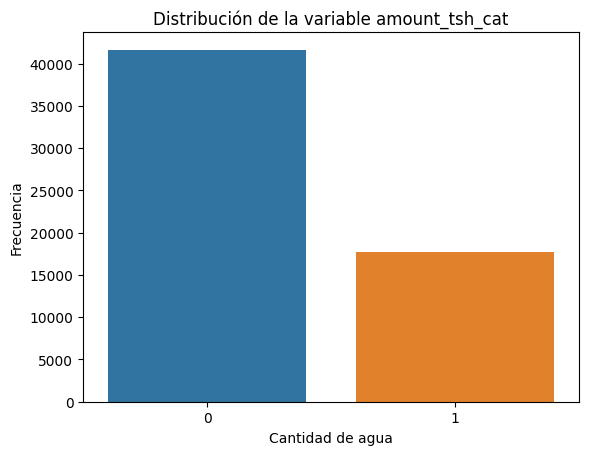

In [ ]:
sns.countplot(data=df_pumps, x='amount_tsh_dum')
plt.xlabel('Cantidad de agua')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable amount_tsh_cat')

plt.show()

##### **<font color='green'>Variable dummies :</font>**

In [ ]:
replacements = {True: 1, False: 0}
df_pumps['permit'] = df_pumps['permit'].replace(replacements)
df_pumps['public_meeting'] = df_pumps['public_meeting'].replace(replacements)

##### **<font color='green'>Variable tipo object :</font>**


In [ ]:
variables_dummies = df_pumps.select_dtypes(include=['object']).columns.to_list()

In [ ]:
for k in variables_dummies:
    dummies = pd.get_dummies(df_pumps[k], prefix=k, drop_first=True)
    df_pumps = pd.concat([df_pumps, dummies], axis=1)
    df_pumps.drop(k, axis=1, inplace=True)

In [ ]:
df_pumps.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,1390.0,34.938093,-9.856322,5.0,109.0,1,0,1999.0,2011.0,...,1,0,0,0,1,0,0,0,0,0
1,8776,1399.0,34.698766,-2.147466,2.0,280.0,1,1,2010.0,2013.0,...,0,0,1,0,1,0,0,0,0,0
2,34310,686.0,37.460664,-3.821329,4.0,250.0,1,1,2009.0,2013.0,...,0,0,1,0,0,1,0,0,0,0
3,67743,263.0,38.486161,-11.155298,63.0,58.0,1,1,1986.0,2013.0,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,31.130847,-1.825359,1.0,150.0,1,1,2000.0,2011.0,...,0,0,1,0,1,0,0,0,0,0


## **<font color='red'>Correlaciones</font>**

##### **<font color='green'>Mapa general:</font>**

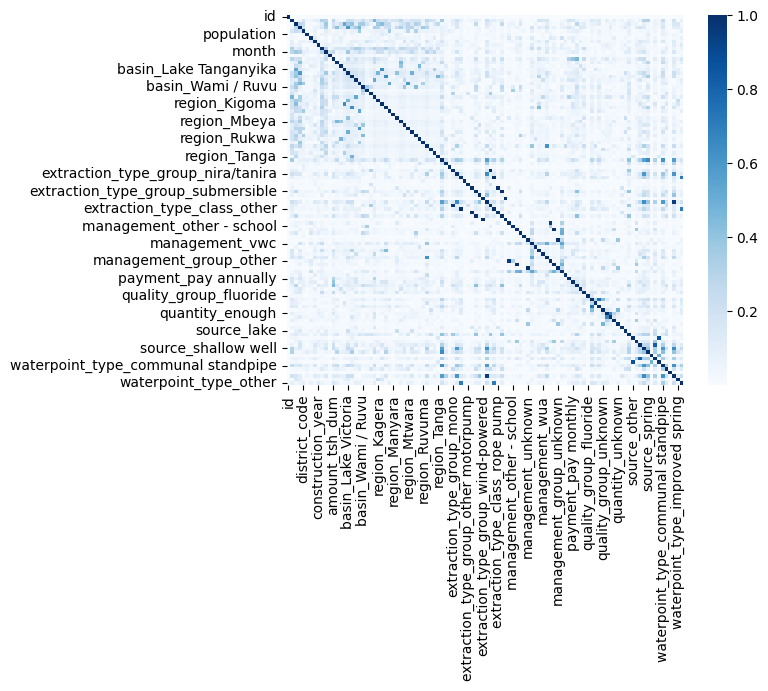

In [ ]:
correlation_mat = abs(df_pumps.corr()) 
sns.heatmap(correlation_mat,  cmap="Blues")
plt.show()

##### **<font color='green'>Visualizando multicolinealidad alta o perfecta:</font>**

In [ ]:
corr_matrix = df_pumps.corr()

# Definir el umbral de correlación
threshold = 0.7

# Encontrar las correlaciones que son mayores que el umbral
high_corr_pairs = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold and abs(corr_matrix.loc[col1, col2]) < 1:
            high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

# Ordenar los pares de mayor a menor correlación
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Mostrar los pares de variables con correlación alta y agregar los nombres sin duplicados a una lista
printed_pairs = set()
corr_cat = []
for pair in high_corr_pairs:
    if (pair[0], pair[1]) not in printed_pairs and (pair[1], pair[0]) not in printed_pairs:
        print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]}")
        printed_pairs.add((pair[0], pair[1]))
        corr_cat.append(pair[0])
        corr_cat.append(pair[1])
        
# Eliminar duplicados de la lista
corr_cat = list(set(corr_cat))


extraction_type_group_mono y extraction_type_class_motorpump tienen una correlación de 0.9783079922450657
management_other y management_group_other tienen una correlación de 0.9452527243571224
extraction_type_class_handpump y waterpoint_type_hand pump tienen una correlación de 0.9440403985605182
source_other y source_class_unknown tienen una correlación de 0.8727769308195436
source_river y source_class_surface tienen una correlación de 0.8169219801273307
extraction_type_group_other y waterpoint_type_other tienen una correlación de 0.7084610992209371
extraction_type_class_other y waterpoint_type_other tienen una correlación de 0.7084610992209371
quality_group_good y quality_group_salty tienen una correlación de -0.7533341078241454


In [ ]:
df_pumps[corr_cat]

,extraction_type_group_other,management_other,waterpoint_type_other,extraction_type_group_mono,extraction_type_class_motorpump,source_river,source_class_surface,waterpoint_type_hand pump,extraction_type_class_other,source_other,management_group_other,quality_group_salty,quality_group_good,source_class_unknown,extraction_type_class_handpump
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59396,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
59397,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
59398,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


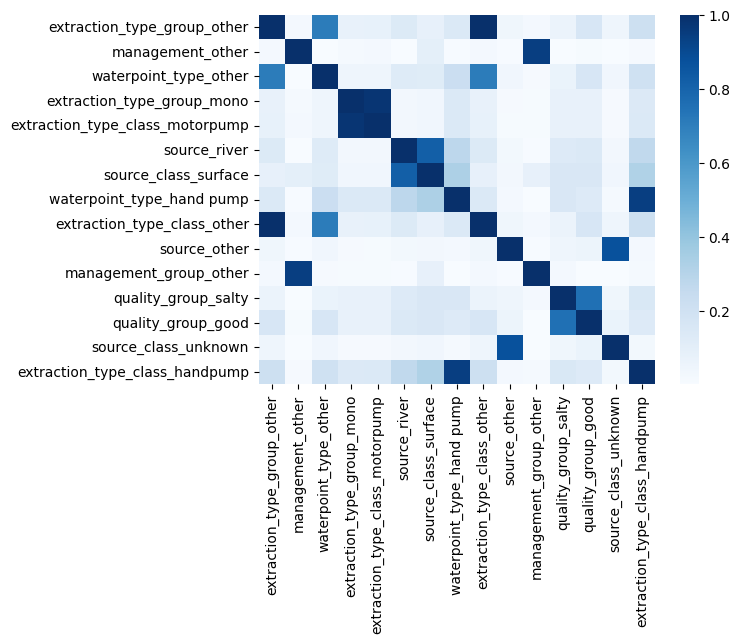

In [ ]:
correlation_mat = abs(df_pumps[corr_cat].corr()) 
sns.heatmap(correlation_mat,  cmap="Blues")
plt.show()

##### **<font color='green'>Eliminando variables con una multicolinealidad alta:</font>**

In [ ]:
df_pumps.drop(columns=['extraction_type_group_other', 'management_other', 'extraction_type_class_handpump', 'source_other', 'source_river', 'waterpoint_type_other', 'quality_group_good', 'extraction_type_group_mono'], axis=1, inplace=True)

## **<font color='red'>Guardando variables</font>**

In [ ]:
labels = pd.read_csv('train_labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
datos = pd.merge(df_pumps, labels, on='id', how='inner')

In [ ]:
datos.to_csv('datosPumpsLimpios.csv', index=False)